In [8]:
reload(matplotlib)
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
#import matplotlib
#matplotlib.use('nbagg')

In [15]:
import numpy as np
import pylab as pl
import mytools as my
import config_y_profile as c
pl.rcParams['figure.figsize'] = (10, 5)

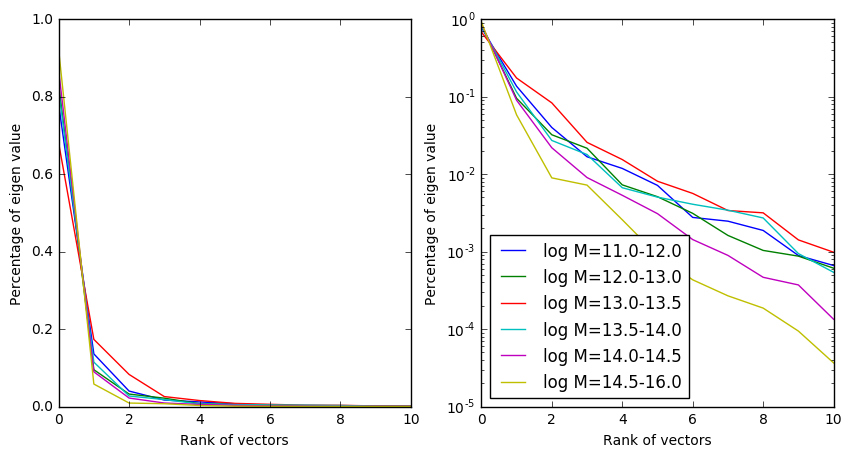

In [16]:
map_type = 'pm'
for mmin, mmax in zip([11, 12, 13, 13.5, 14, 14.5], [12, 13, 13.5, 14, 14.5, 16]):
    jackf = 'mj_jack_%s_%d_r_%.1f_%.1f_FS%d.npz'%(map_type,
                                                  c.jack_nside,
                                                  mmin, mmax,
                                        np.logical_not(c.remove_obj_radec))
    jf = np.load(jackf)
    cov_matrix = jf['cov_matrix']
    U,s,V=np.linalg.svd(cov_matrix)
    perc = s/np.sum(s)
    pl.subplot(121)
    pl.plot(np.arange(perc.shape[0]), perc, label='log M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Rank of vectors') 
    pl.ylabel('Percentage of eigen value')
    pl.subplot(122)
    pl.semilogy(np.arange(perc.shape[0]), perc, label='log M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Rank of vectors') 
    pl.ylabel('Percentage of eigen value')
pl.legend(loc=0)

In [12]:
f = np.genfromtxt('regularized_chisq_pm.txt', skip_header=1, delimiter=',')

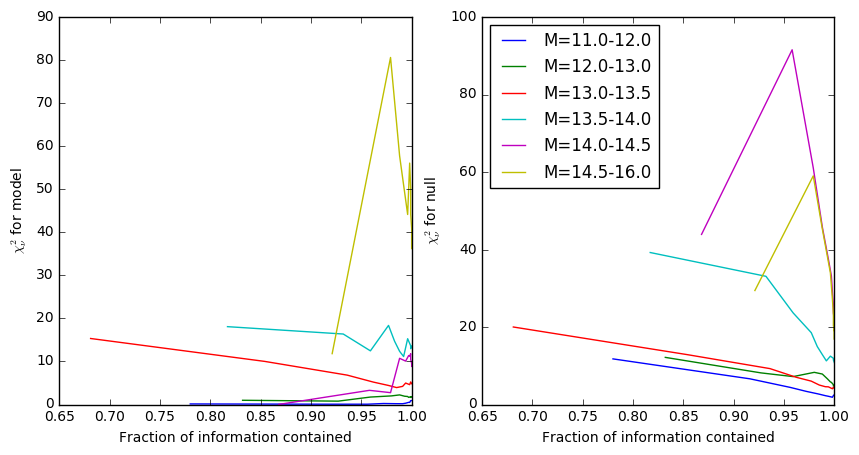

In [17]:
for i in range(f.shape[0]):
    frac = f[i][2:-1:5]
    chisq = f[i][3::5]
    chisq_nu = f[i][4::5]
    chisq_null = f[i][5::5]
    chisq_null_nu = f[i][6::5]
    mmin, mmax = f[i][0], f[i][1]
    pl.subplot(121)
    pl.plot(frac, chisq_nu, label='M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Fraction of information contained')
    pl.ylabel(r'$\chi^2_\nu$ for model')
    pl.subplot(122)
    pl.plot(frac, chisq_null_nu, label='M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Fraction of information contained')
    pl.ylabel(r'$\chi^2_\nu$ for null')
pl.legend(loc=0)    

In [18]:
f = np.genfromtxt('regularized_chisq_pm_FminusL.txt', skip_header=1, delimiter=',')

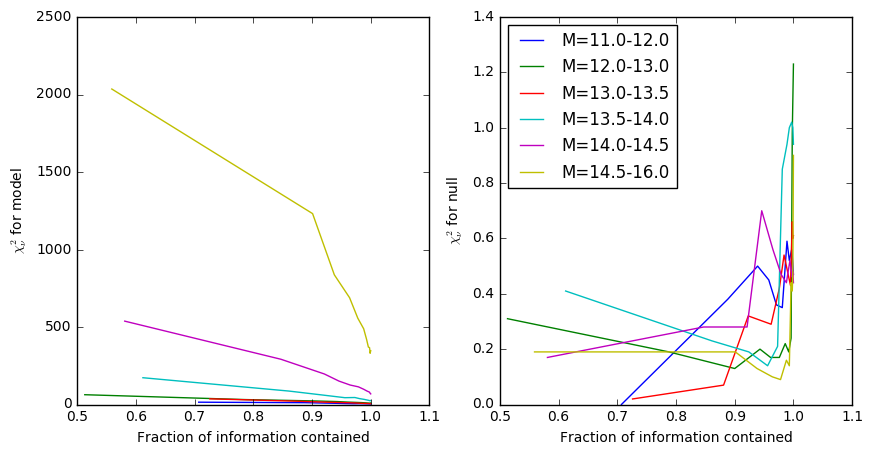

In [19]:
for i in range(f.shape[0]):
    frac = f[i][2:-1:5]
    chisq = f[i][3::5]
    chisq_nu = f[i][4::5]
    chisq_null = f[i][5::5]
    chisq_null_nu = f[i][6::5]
    mmin, mmax = f[i][0], f[i][1]
    pl.subplot(121)
    pl.plot(frac, chisq_nu, label='M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Fraction of information contained')
    pl.ylabel(r'$\chi^2_\nu$ for model')
    pl.subplot(122)
    pl.plot(frac, chisq_null_nu, label='M=%.1f-%.1f'%(mmin, mmax))
    pl.xlabel('Fraction of information contained')
    pl.ylabel(r'$\chi^2_\nu$ for null')
pl.legend(loc=0)   